<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(_3_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-3.2'

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n120.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.636396,59.621251,71.311720,-0.000430,203.568937,203.569506,-0.000570
1,0.0,1.0,81.462764,57.347198,47.160506,0.001285,195.971752,195.971280,0.000472
2,0.0,2.0,69.413709,50.316991,38.608854,-0.001151,168.338403,168.340608,-0.002205
3,0.0,3.0,97.416442,36.548108,67.170318,0.004793,211.139660,211.135543,0.004118
4,0.0,4.0,48.907890,21.775968,80.421043,0.009854,161.114755,161.105256,0.009499
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,20.857714,46.988897,65.585601,-0.001846,143.430366,143.431926,-0.001560
119996,999.0,116.0,56.493301,89.309098,93.287684,0.001386,249.091468,249.090411,0.001057
119997,999.0,117.0,41.473854,78.144097,34.187442,0.000243,163.805637,163.805390,0.000246
119998,999.0,118.0,74.853999,48.275706,70.085657,-0.001620,203.213743,203.215486,-0.001744


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    62.636396  59.621251  71.311720  ...  203.568937  203.569506 -0.000570
      1.0    81.462764  57.347198  47.160506  ...  195.971752  195.971280  0.000472
      2.0    69.413709  50.316991  38.608854  ...  168.338403  168.340608 -0.002205
      3.0    97.416442  36.548108  67.170318  ...  211.139660  211.135543  0.004118
      4.0    48.907890  21.775968  80.421043  ...  161.114755  161.105256  0.009499
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  20.857714  46.988897  65.585601  ...  143.430366  143.431926 -0.001560
      116.0  56.493301  89.309098  93.287684  ...  249.091468  249.090411  0.001057
      117.0  41.473854  78.144097  34.187442  ...  163.805637  163.805390  0.000246
      118.0  74.853999  48.275706  70.085657  ...  203.213743  203.215486 -0.001744
      119.0  51.299693  74.003794  82.152189  ...  217.456452  217.455836  0.000616

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    62.636396  59.621251  71.311720  ...  203.568937  203.569506 -0.000570
      1.0    81.462764  57.347198  47.160506  ...  195.971752  195.971280  0.000472
      2.0    69.413709  50.316991  38.608854  ...  168.338403  168.340608 -0.002205
      3.0    97.416442  36.548108  67.170318  ...  211.139660  211.135543  0.004118
      4.0    48.907890  21.775968  80.421043  ...  161.114755  161.105256  0.009499
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  20.857714  46.988897  65.585601  ...  143.430366  143.431926 -0.001560
      116.0  56.493301  89.309098  93.287684  ...  249.091468  249.090411  0.001057
      117.0  41.473854  78.144097  34.187442  ...  163.805637  163.805390  0.000246
      118.0  74.853999  48.275706  70.085657  ...  203.213743  203.215486 -0.001744
      119.0  51.299693  74.003794  82.152189  ...  217.456452  217.455836  0.000616

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.636396,59.621251,71.311720,-0.000430,203.568937,203.569506,-0.000570
1,0.0,1.0,81.462764,57.347198,47.160506,0.001285,195.971752,195.971280,0.000472
2,0.0,2.0,69.413709,50.316991,38.608854,-0.001151,168.338403,168.340608,-0.002205
3,0.0,3.0,97.416442,36.548108,67.170318,0.004793,211.139660,211.135543,0.004118
4,0.0,4.0,48.907890,21.775968,80.421043,0.009854,161.114755,161.105256,0.009499
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,20.857714,46.988897,65.585601,-0.001846,143.430366,143.431926,-0.001560
119996,999.0,116.0,56.493301,89.309098,93.287684,0.001386,249.091468,249.090411,0.001057
119997,999.0,117.0,41.473854,78.144097,34.187442,0.000243,163.805637,163.805390,0.000246
119998,999.0,118.0,74.853999,48.275706,70.085657,-0.001620,203.213743,203.215486,-0.001744


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    62.636396  59.621251  71.311720  ...  203.568937  203.569506 -0.000570
      1.0    81.462764  57.347198  47.160506  ...  195.971752  195.971280  0.000472
      2.0    69.413709  50.316991  38.608854  ...  168.338403  168.340608 -0.002205
      3.0    97.416442  36.548108  67.170318  ...  211.139660  211.135543  0.004118
      4.0    48.907890  21.775968  80.421043  ...  161.114755  161.105256  0.009499
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  20.857714  46.988897  65.585601  ...  143.430366  143.431926 -0.001560
      116.0  56.493301  89.309098  93.287684  ...  249.091468  249.090411  0.001057
      117.0  41.473854  78.144097  34.187442  ...  163.805637  163.805390  0.000246
      118.0  74.853999  48.275706  70.085657  ...  203.213743  203.215486 -0.001744
      119.0  51.299693  74.003794  82.152189  ...  217.456452  217.455836  0.000616

[120000 rows x 7 columns]

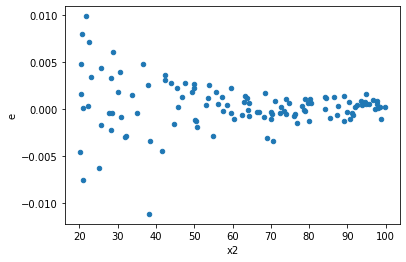

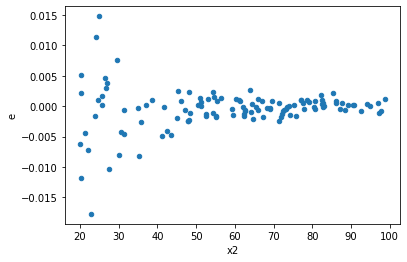

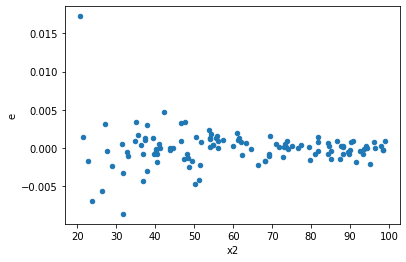

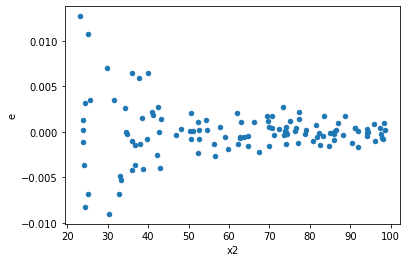

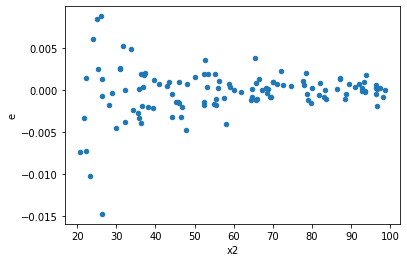

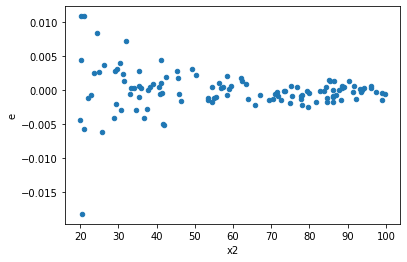

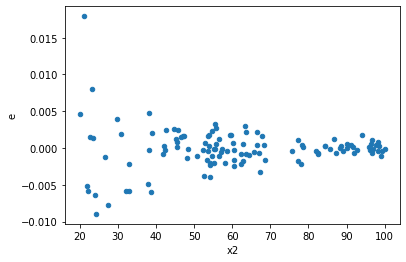

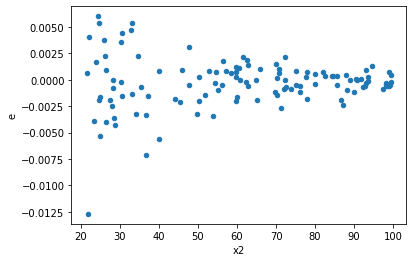

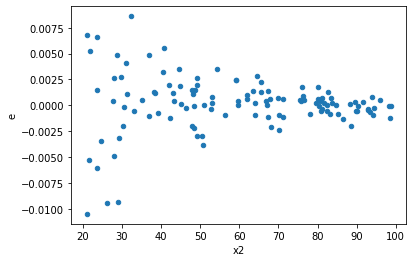

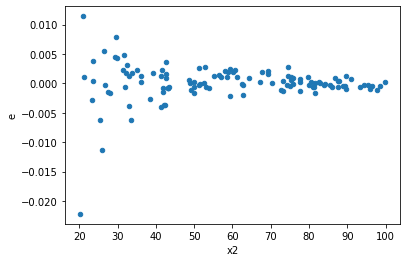

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,63.0,51.0,6.770399509530454e-05,0.0006525355217898389,1.0746665888143578e-06,1.2794814152741938e-05,11.90584529743128,6.661338147750939e-16,0.9999999999999997,3.3306690738754696e-16,Reject001=0 : Heteroscedasticity
6.0,62.0,52.0,0.00019396456241503533,0.0006980683135470294,3.128460684113473e-06,1.3424390645135181e-05,4.291053013165583,2.8392047068948045e-07,0.9999998580397647,1.4196023534474023e-07,Reject001=0 : Heteroscedasticity
8.0,60.0,54.0,0.0003666488242899422,0.0004404167355810522,6.110813738165703e-06,8.155865473723188e-06,1.3346611144085292,0.28272576436388963,0.8586371178180552,0.14136288218194482,Reject001=1 : Homoscedasticity
11.0,50.0,64.0,0.00028059899952562233,0.0004713114139130879,5.611979990512447e-06,7.364240842391999e-06,1.3122357625725511,0.303678830124706,0.848160584937647,0.151839415062353,Reject001=1 : Homoscedasticity
12.0,61.0,53.0,0.0006741877191429293,0.0007534124980866804,1.1052257690867693e-05,1.4215330152578875e-05,1.2861924278443833,0.3506197520840053,0.8246901239579973,0.17530987604200265,Reject001=1 : Homoscedasticity
13.0,54.0,60.0,0.00031036836255410246,0.00044258166208433115,5.747562269520416e-06,7.3763610347388526e-06,1.283389494335021,0.34622464708960776,0.8268876764551961,0.17311232354480388,Reject001=1 : Homoscedasticity
15.0,54.0,60.0,6.535417364984996e-05,0.0007492078585266818,1.2102624749972215e-06,1.2486797642111363e-05,10.317429400709155,4.440892098500626e-16,0.9999999999999998,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
16.0,65.0,49.0,5.678275045371437e-05,0.0021126391676203897,8.735807762109903e-07,4.311508505347734e-05,49.35443433231414,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
17.0,60.0,54.0,0.00010112891528977739,0.0013650184444383342,1.6854819214962897e-06,2.5278119341450633e-05,14.997561836207614,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,63.0,51.0,6.770399509530454e-05,0.0006525355217898389,1.0746665888143578e-06,1.2794814152741938e-05,11.90584529743128,6.661338147750939e-16,Reject001=0 : Heteroscedasticity
1.0,45.0,69.0,0.0013226745373406124,0.0001392509902394103,2.9392767496458052e-05,2.018130293324787e-06,0.06866077832133295,2.153123296936193e-16,Reject001=0 : Heteroscedasticity
2.0,60.0,54.0,0.0006208690217420385,4.493503993237273e-05,1.0347817029033976e-05,8.321303691180136e-07,0.08041603043262327,4.063114657477858e-18,Reject001=0 : Heteroscedasticity
3.0,49.0,65.0,0.0005934508313218859,0.00034371194338152466,1.2111241455548692e-05,5.287876052023457e-06,0.43660892002122936,0.002939523521066838,Reject001=0 : Heteroscedasticity
4.0,59.0,55.0,0.0008335921787434149,7.060703945427903e-05,1.41286809956511e-05,1.2837643537141643e-06,0.09086229309794136,1.2538765591355435e-16,Reject001=0 : Heteroscedasticity
5.0,57.0,57.0,0.0010313790397558312,6.154382794535238e-05,1.8094369118523354e-05,1.0797162797430242e-06,0.05967139681248736,8.041024317131878e-21,Reject001=0 : Heteroscedasticity
6.0,62.0,52.0,0.00019396456241503533,0.0006980683135470294,3.128460684113473e-06,1.3424390645135181e-05,4.291053013165583,2.8392047068948045e-07,Reject001=0 : Heteroscedasticity
7.0,55.0,59.0,0.0005768224004173657,0.00010391509660840189,1.0487680007588466e-05,1.7612728238712185e-06,0.16793731526866112,3.7121293127612154e-10,Reject001=0 : Heteroscedasticity
8.0,60.0,54.0,0.0003666488242899422,0.0004404167355810522,6.110813738165703e-06,8.155865473723188e-06,1.3346611144085292,0.28272576436388963,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    635
Reject001=1 : Homoscedasticity      365
Name: Result_test, dtype: int64